IMDB
- 영화 데이터 베이스
- 훈련 데이터 2만 5천, 테스트 데이터 2만 5천
- 50% 부정, 50% 긍정

Data
- 리뷰의 목록, 단어 인덱스의 리스트

Label
- 0 : 부정, 1: 긍정

In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


영화 리뷰 데이터 가져오기
훈련 데이터와 테스트 데이터를 50:50 비율로 구분

num_words => 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지 갖고 올 것인지 조절, 단어의 개수

넘파이 1.16.3 버전에서 allow_pickle 매개변수 기본값이 true에서 false로 바뀜

=> imdb.load_data() 오류 발생
=> np.load의 dafault parameter값을 변경해야한다.

( 참고 )

https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa
https://tensorflow.blog/2019/04/29/keras-datasets-imdb-load_data-%EC%98%A4%EB%A5%98/

In [2]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

np.load = np_load_old


data를 원래 영어단어, 리뷰로 바꾸기

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

원-핫 벡터 방식으로 정수리스트를 이진 시퀀스로 바꾸기

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [5]:
# 예시
x = [1, 2 ,3]
x = vectorize_sequences(x)
x

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = vectorize_sequences(train_labels)
y_test = vectorize_sequences(test_labels)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

모델 신경망 구성
- 16개의 은닉 유닛을 가진 2개의 은닉 층 => relu
- 리뷰 값의 예측으로 출력하는 세번째 층 => sigmoid

In [8]:
from keras import models
from keras import layers

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


손실 함수
- 이진 분류 문제, 신경망의 출력이 확률 => binary_crossentropy or mean_squared_error 적합
- 확률을 출력하는 모델 => 크로스엔트로피가 적합(확률 분포 간의 차이 측정)

옵티마이져 : rmsprop

손실함수 : binary_crossentropy

In [10]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

모델의 정확도를 측정하기 위해 원본 훈련 데이터에서 10000개를 검증 세트로 만든다

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델 훈련
- 512개 샘플씩 미니 배치를 만들어 20번의 epoch동안 훈련

In [12]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 308us/step - loss: 0.5090 - acc: 0.7824 - val_loss: 0.3803 - val_acc: 0.8682
Epoch 2/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.3007 - acc: 0.9047 - val_loss: 0.3005 - val_acc: 0.8902
Epoch 3/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.2180 - acc: 0.9284 - val_loss: 0.3088 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.1751 - acc: 0.9435 - val_loss: 0.2839 - val_acc: 0.8836
Epoch 5/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.1428 - acc: 0.9544 - val_loss: 0.2848 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.1151 - acc: 0.9651 - val_loss: 0.3154 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 3s 211us/step - 

훈련과 검증 손실 그리기

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

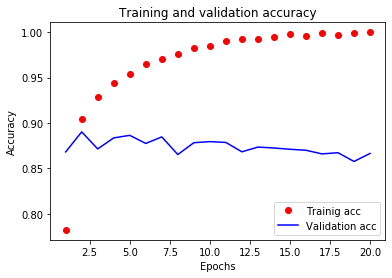

In [14]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'ro', label = 'Trainig acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.4748 - acc: 0.8214
Epoch 2/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2650 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 4s 140us/step - loss: 0.1982 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 6s 234us/step


In [17]:
results

[0.3207543730306625, 0.87368]

In [18]:
model.predict(x_test)

array([[0.1409764 ],
       [0.999698  ],
       [0.31536967],
       ...,
       [0.07365006],
       [0.04483104],
       [0.4753972 ]], dtype=float32)